In [1]:
# import library
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
#import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline



# About the Data Set
This dataset is about Collisions-all years. The __Data-Collisons.csv__ data set includes details of 37 attributes and severity (5 category, 3/2b/2/1/0). It includes following fields:

| Field          | Data Type, Length      | Description                                                                  |
|----------------|-------------------------------------------------------------------------------------------------------|
| OBJECTID       | ObjectID               | ESRI unique identifier                                                       |
| SHAPE          | Geometry               | ESRI geometry field                                                          |
| INCKEY         | Long                   | A unique key for the incident                                                |
| COLDETKEY      | Long                   | Secondary key for the incident                                               |
| ADDRTYPE       | Text, 12               | Collision address type:                                                      |
|                |                        |           • Alley                                                            |
|                |                        |           • Block                                                            |
|                |                        |           • Intersection                                                     |
| INTKEY         | Double                 | Key that corresponds to the intersection associated with a collision         |
| LOCATION       | Text, 255              | Description of the general location of the                                   |
| EXCEPTRSNCODE  | Text, 10               |                                                                              |
| EXCEPTRSNDESC  | Text, 300              |                                                                              |
| SEVERITYCODE   | Text, 100              | A code that corresponds to the severity of the collision:                    |
|                |                        |            • 3—fatality                                                      |
|                |                        |            • 2b—serious injury                                               |
|                |                        |            • 2—injury                                                        |
|                |                        |            • 1—prop damage                                                   |
|                |                        |            • 0—unknown                                                       |
| SEVERITYDESC   | Text                   | A detailed description of the severity of the collision                      |
| COLLISIONTYPE  | Text, 300              | Collision type                                                               |
| PERSONCOUNT    | Double                 | The total number of people involved in the collision                         |
| PEDCOUNT       | Double                 | The number of pedestrians involved in the collision                          |
| PEDCYLCOUNT    | Double                 | The number of bicycles involved in the collision                             |
| VEHCOUNT       | Double                 | The number of vehicles involved in the collision                             |
| INJURIES       | Double                 | The number of total injuries in the collision                                |
| SERIOUSINJURIES| Double                 | The number of serious injuries in the collision                              |
| FATALITIES     | Double                 | The number of fatalities in the collision                                    |
| INCDATE        | Date                   | The date of the incident.                                                    |
| INCDTTM        | Text, 30               | The date and time of the incident.                                           |
| JUNCTIONTYPE   | Text, 300              | Category of junction at which collision took place                           |
| SDOT_COLCODE   | Text, 10               | A code given to the collision by SDOT.                                       |
| SDOT_COLDESC   | Text, 300              | A description of the collision corresponding to collision code               |
| INATTENTIONIND | Text, 1                | Whether or not collision was due to inattention. (Y/N)                       |
| UNDERINFL      | Text, 10               | Whether or not a driver involved was under the influence of                  |
|                |                        | drugs or alcohol.                                                            |
| WEATHER        | Text, 300              | A description of the weather conditions during the time of the collision.    |
| ROADCOND       | Text, 300              | The condition of the road during the collision.                              |
| LIGHTCOND      | Text, 300              | The light conditions during the collision.                                   |
| PEDROWNOTGRNT  | Text, 1                | Whether or not the pedestrian right of way was not granted. (Y/N)            |
| SDOTCOLNUM     | Text, 10               | A number given to the collision by SDOT.                                     |
| SPEEDING       | Text, 1                | Whether or not speeding was a factor in the collision. (Y/N)                 |
| ST_COLCODE     | Text, 10               | A code provided by the state that describes the collision.                   |
|                |                        | For more information about these codes, please see the State Collision Code  |
|                |                        | Dictionary.                                                                  |
| ST_COLDESC     | Text, 300              | A description that corresponds to the state’s coding designation.           |
| SEGLANEKEY     | Long                   | A key for the lane segment in which the collision occurred.                  |
| CROSSWALKKEY   | Long                   | A key for the crosswalk at which the collision occurred.                     |
| HITPARKEDCAR   | Text, 1                | Whether or not the collision involved hitting a parked car. (Y/N)            |


In [2]:
# Get the source data
!wget -O data_collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-20 11:10:38--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘data_collisions.csv’

100%[======================================>] 73,917,638  45.9MB/s   in 1.5s   

2020-09-20 11:10:40 (45.9 MB/s) - ‘data_collisions.csv’ saved [73917638/73917638]



In [11]:
df = pd.read_csv('data_collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [12]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
#df.info() 
# Calculating the number of null values
df.isnull().sum()
# G : COLLISIONTYPE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT,  / UNDERINFL, WEATHER, ROADCOND, LIGHTCOND

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [13]:
#df['WEATHER'].value_counts()
#Replace NaN with 'Unknown'
replace_value =  {'WEATHER': 'Unknown', 'ROADCOND': 'Unknown', 'LIGHTCOND': 'Unknown'}
df.fillna(value=replace_value, inplace=True)

df.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=True)
# Overall Severity code1 - 70%, 2 - 30% 

df['ROADCOND'].value_counts()
df.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=True)
# Overall Severity code 1 - 67%, 2 - 32%, ice /snow/standing water decrease Code 2 

df['LIGHTCOND'].value_counts() # Unknown - 13473, Other - 235
df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=True)
# Overall Severity code 1 - 70%, 2 - 30%, Dark-NO street Lights / Dark-Street light off

LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision    0.782694
                          Injury Collision                  0.217306
Dark - Street Lights Off  Property Damage Only Collision    0.736447
                          Injury Collision                  0.263553
Dark - Street Lights On   Property Damage Only Collision    0.701589
                          Injury Collision                  0.298411
Dark - Unknown Lighting   Property Damage Only Collision    0.636364
                          Injury Collision                  0.363636
Dawn                      Property Damage Only Collision    0.670663
                          Injury Collision                  0.329337
Daylight                  Property Damage Only Collision    0.668116
                          Injury Collision                  0.331884
Dusk                      Property Damage Only Collision    0.670620
                          Injury Collision    

In [14]:
# Check relationship between No Incidents in same location and Weahter, Road codition and Ligght condition
df['LOCATION'].value_counts()
df['LOCATION'].describe()  # mean of number of incidents occurened in same location = 3

df_filltered = df

# Filtered by value caounts of lcation to get location value multiple collision occured
df_loc = pd.DataFrame(df_filltered['LOCATION'].value_counts(dropna=True, sort=True).rename_axis('LOCATION').reset_index(name='INC_HIGH_LOC'))
df_loc.describe()
df_loc = df_loc[df_loc.INC_HIGH_LOC > 20] # mean = 3, 75% - 8
#df_loc.head()

# Filter data set with multiple incident case in same location 
# Probability of Severity Code 2 cases increased : Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,  
df_filltered = df_filltered.assign(result=df_filltered['LOCATION'].isin(df_loc['LOCATION']).astype(int))    
df_filltered = df_filltered[df_filltered.result != 0]

In [15]:
# Target Set
df_tSet = df[['SEVERITYCODE', 'SEVERITYDESC', 'PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'WEATHER','ROADCOND', 'LIGHTCOND']]
df_fSet = df_filltered[['SEVERITYCODE', 'SEVERITYDESC', 'PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'WEATHER','ROADCOND', 'LIGHTCOND']]
df_tSet.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=True)
df_tSet.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=True)
df_tSet.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=True)

#df_tSet.head()

df_tSet.PERSONCOUNT.describe()
df_tSet.VEHCOUNT.describe()
df_tSet.PEDCOUNT.describe()
df_tSet.PEDCYLCOUNT.describe()
# PEDCOUNT, PDECYLCOUNT most of value = 0

count    194673.000000
mean          0.028391
std           0.167413
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

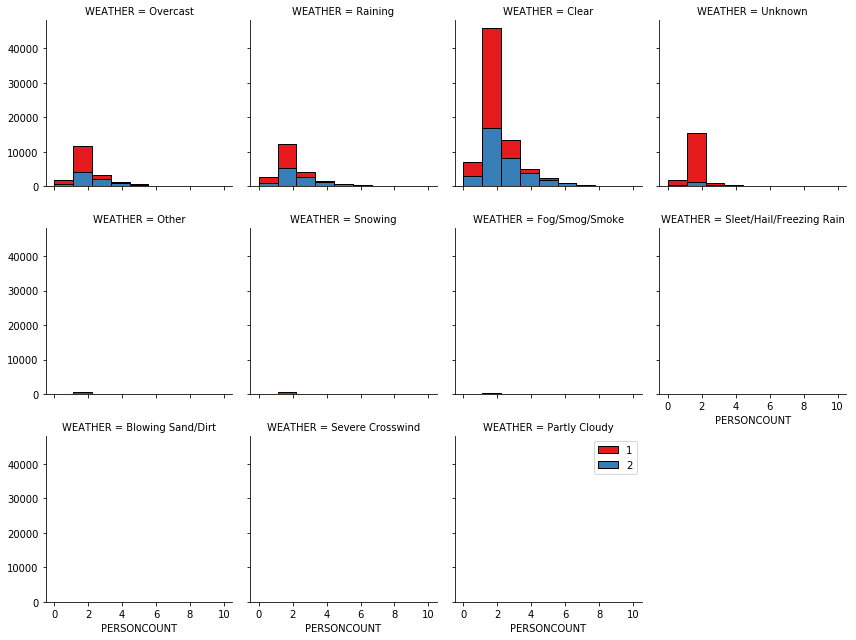

In [16]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

import seaborn as sns
#PERSONCOOUNT : min 0, max 81, 75% 3
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_tSet, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
    # Overcast, Raining, Clear, Snowing, Fog/Smog/Smoke / Delete : Unknown, Other, Sleet/Hail/Freezing Rain....

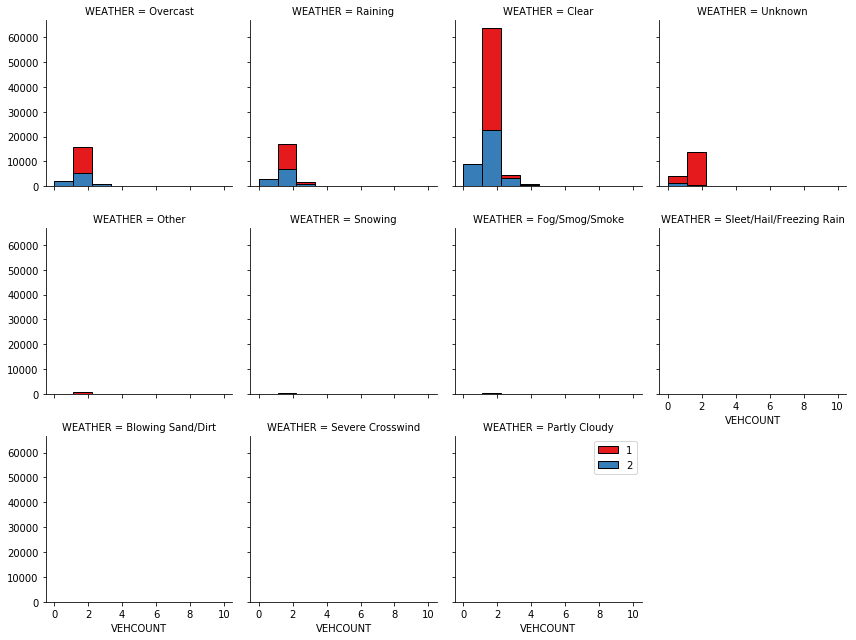

In [17]:
# VEHCOUNT : min 0, max 12, 75% 2
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_tSet, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
# Overcast , Raining, Clear, Snow / Delete : Unknown, Other

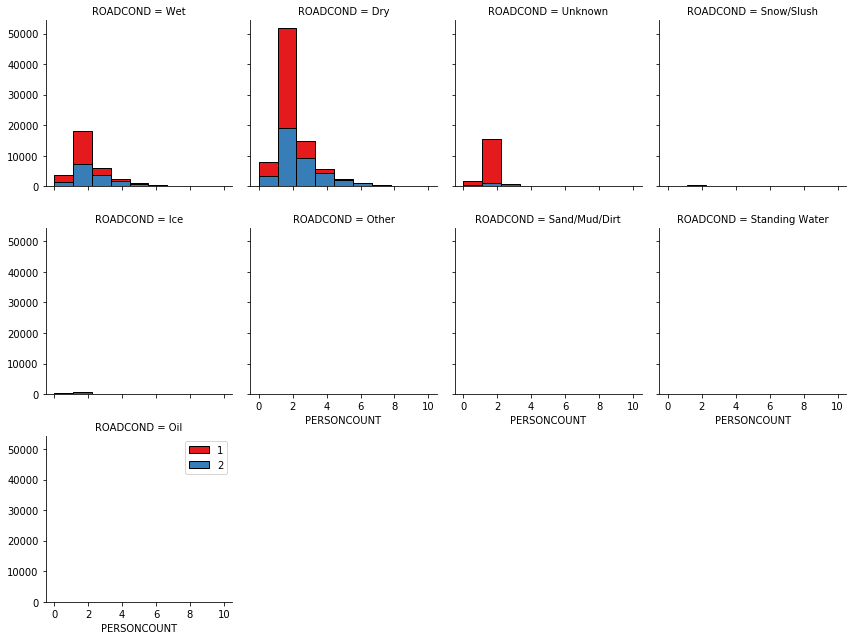

In [18]:
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_tSet, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
# Wet, Dry, Ice / Delete : Unknown

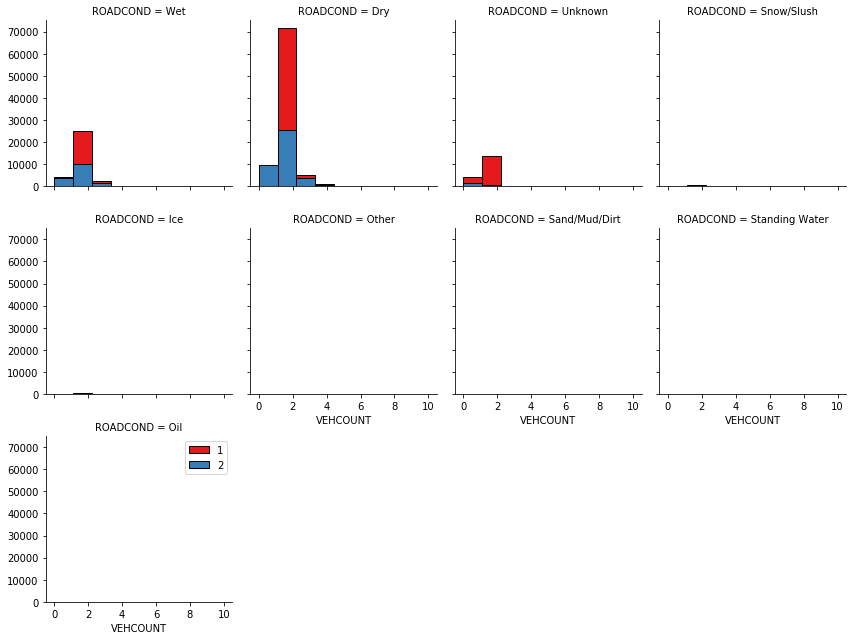

In [19]:
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_tSet, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
# Wet, Dry / Unknown

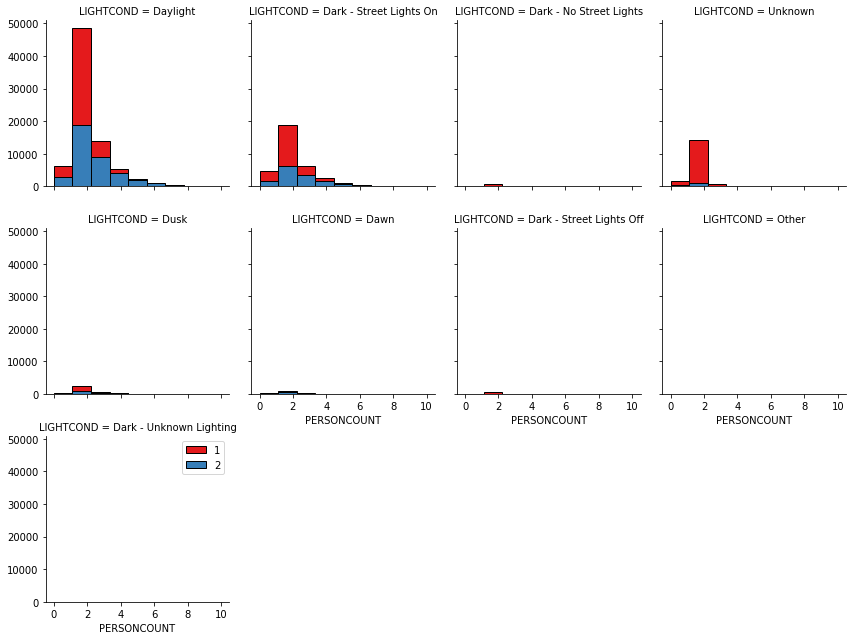

In [20]:
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_tSet, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Daylgiht, Dark-Street Lignts On, Dusk, Dawn, Dark-Street Light Off / Delete : Unknown

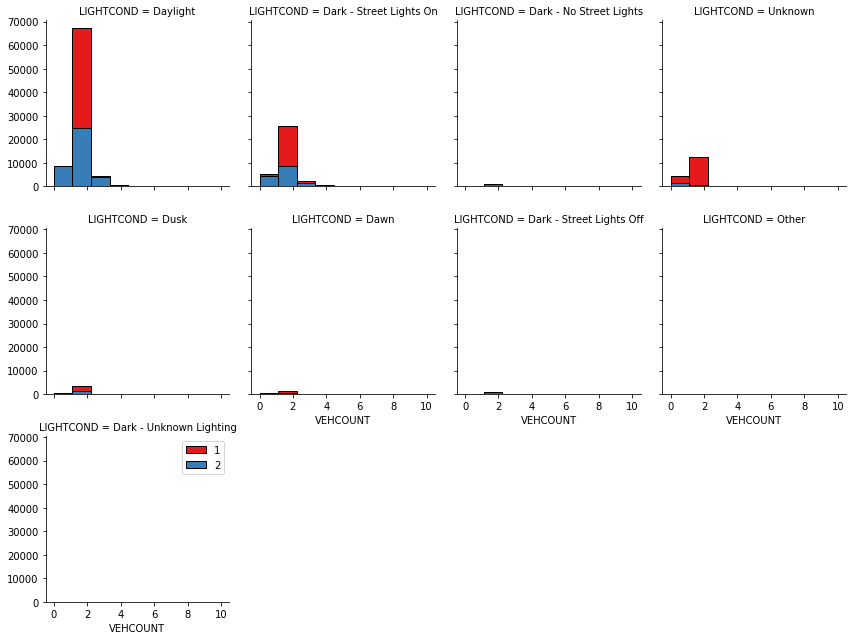

In [21]:
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_tSet, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Daylight, Dark-Street Lights On, Dusk, Dawn, Dark-Steet Lights Off / Unknown

In [22]:
df_fSet = df_filltered[['SEVERITYCODE', 'SEVERITYDESC', 'PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'WEATHER','ROADCOND', 'LIGHTCOND']]
df_fSet.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=True)
df_fSet.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=True)
df_fSet.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=True)


LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision    0.683582
                          Injury Collision                  0.316418
Dark - Street Lights Off  Property Damage Only Collision    0.628755
                          Injury Collision                  0.371245
Dark - Street Lights On   Property Damage Only Collision    0.652006
                          Injury Collision                  0.347994
Dark - Unknown Lighting   Property Damage Only Collision    1.000000
Dawn                      Property Damage Only Collision    0.625776
                          Injury Collision                  0.374224
Daylight                  Property Damage Only Collision    0.641219
                          Injury Collision                  0.358781
Dusk                      Property Damage Only Collision    0.640097
                          Injury Collision                  0.359903
Other                     Property Damage Only

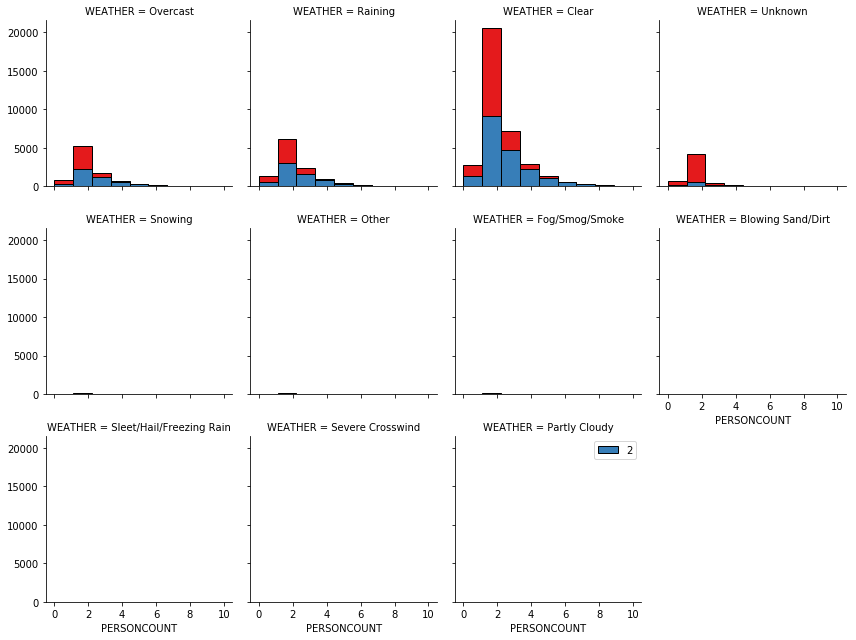

In [23]:
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_fSet, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
# Overcast, Raining, Clear, Snowing, Fog/Smog/Smoke / Delete : Unknown, Other, Sleet/Hail/Freezing Rain....

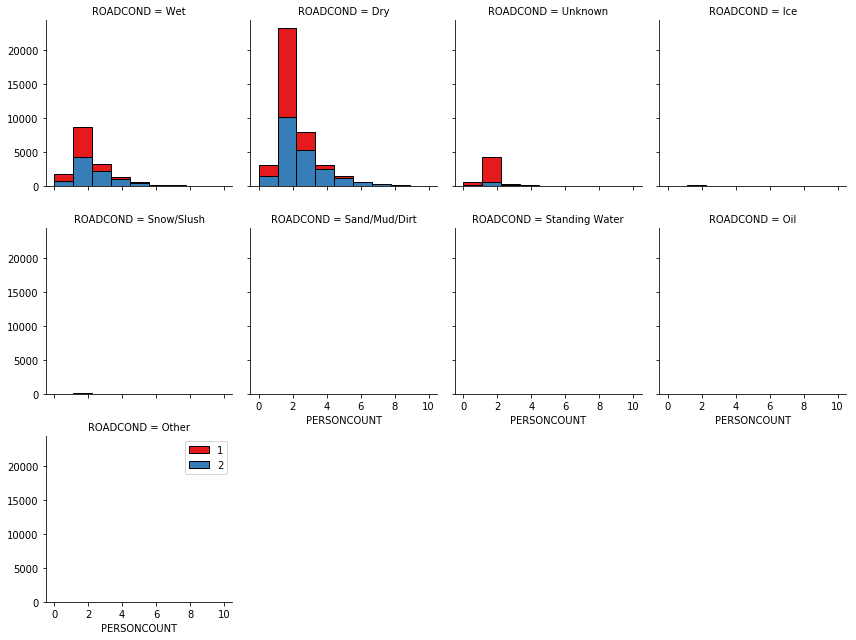

In [24]:
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_fSet, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
# No notable difference from non filltered set

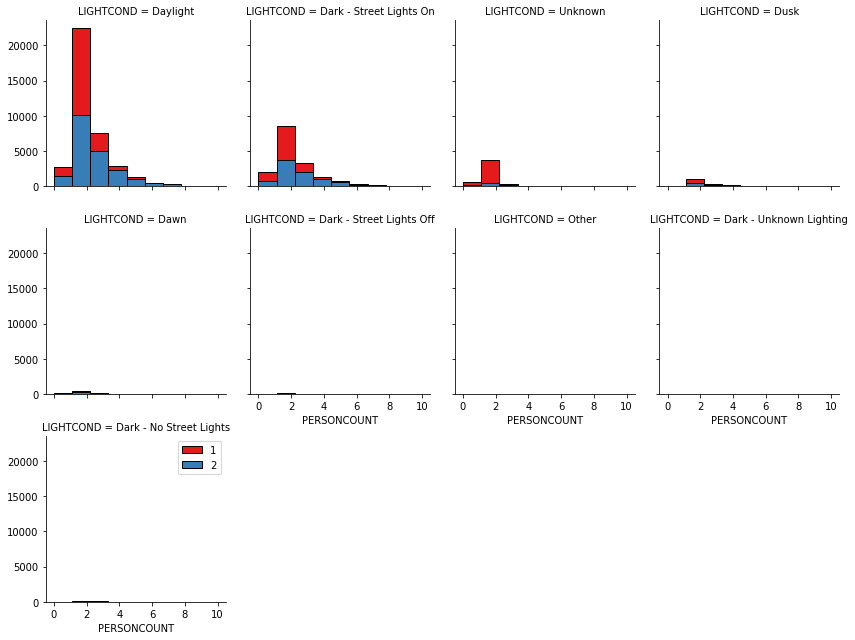

In [25]:
bins = np.linspace(0, 10, 10)
g = sns.FacetGrid(df_fSet, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
# No notable difference from non filltered set

In [26]:
df_tSet['WEATHER'].value_counts()
df_tSet['ROADCOND'].value_counts()
df_tSet['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      18643
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [27]:
#convert categorical varables to binary variables and append them to the feature Data Frame
# WEATHER : Overcast, Raining, Clear, Snowing, Fog/Smog/Smoke  (Delete : Unknown, Other, Sleet/Hail/Freezing Rain....)
# ROADCOND : Wet, Dry, Ice, Snow/Slush (Delete : Unknown )
# LIGHTCOND : Daylight, Dark-Street Lights On, Dusk, Dawn, Dark-Steet Lights Off, Dark - No Street Lights (Delete : Unknown ...)
Feature = df[['PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
Feature = pd.concat([Feature,pd.get_dummies(df_tSet['WEATHER'])], axis=1)
Feature.drop(['Unknown','Other', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_tSet['ROADCOND'])], axis=1)
Feature.drop(['Unknown','Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_tSet['LIGHTCOND'])], axis=1)
Feature.drop(['Unknown','Other', 'Dark - Unknown Lighting'], axis = 1,inplace=True)

# drop count column 
Feature.drop(['PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT'], axis = 1,inplace=True)

Feature.head()

,Clear,Fog/Smog/Smoke,Overcast,Raining,Snowing,Dry,Ice,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [28]:
X = Feature
X[0:5]

,Clear,Fog/Smog/Smoke,Overcast,Raining,Snowing,Dry,Ice,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [29]:
y = df_tSet['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [30]:
# Normalize Data
# Data Standardization give data zero mean and unit variance (technically should be done after train test split )
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[-1.15340914, -0.05414257,  2.45445634, -0.45298634, -0.06841713,
        -1.33213439, -0.07905204, -0.07200071,  1.76085874, -0.08920831,
        -0.07872239, -0.576075  , -0.1141037 ,  0.82233559, -0.17682024],
       [-1.15340914, -0.05414257, -0.4074222 ,  2.2075721 , -0.06841713,
        -1.33213439, -0.07905204, -0.07200071,  1.76085874, -0.08920831,
        -0.07872239,  1.73588509, -0.1141037 , -1.21604855, -0.17682024],
       [-1.15340914, -0.05414257,  2.45445634, -0.45298634, -0.06841713,
         0.75067501, -0.07905204, -0.07200071, -0.56790473, -0.08920831,
        -0.07872239, -0.576075  , -0.1141037 ,  0.82233559, -0.17682024],
       [ 0.86699503, -0.05414257, -0.4074222 , -0.45298634, -0.06841713,
         0.75067501, -0.07905204, -0.07200071, -0.56790473, -0.08920831,
        -0.07872239, -0.576075  , -0.1141037 ,  0.82233559, -0.17682024],
       [-1.15340914, -0.05414257, -0.4074222 ,  2.2075721 , -0.06841713,
        -1.33213439, -0.07905204, -0.07200071, 

In [31]:
# Set evaluation report
d = {"Algorithm":['KNN','Decision Tree','SVM', 'LogisticRegression']} 
df_report = pd.DataFrame(data=d )
df_report['Jaccard'] = [0.0, 0.0, 0.0, 0.0]
df_report['F1-score'] = [0.0, 0.0, 0.0, 0.0]
df_report['LogLoss'] = ['NA', 'NA', 'NA', 0.0]
df_report = df_report.set_index('Algorithm')

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (136271, 15) (136271,)
Test set: (58402, 15) (58402,)


In [32]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# It takes abt 1 hour

# finding best K
Ks = 10 
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict, evaluation using accuarcy classificaiton score equal to jaccard_similary_socre  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66679223, 0.60664018, 0.66763125, 0.64133078, 0.69812678,
       0.54717304, 0.57352488, 0.52998185, 0.57359337])

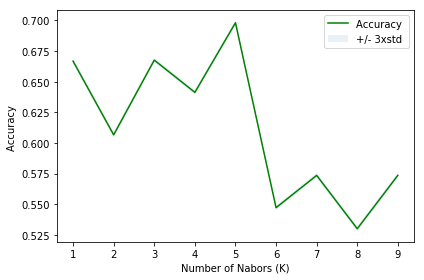

The best accuracy was with 0.6981267764802576 with k= 5


,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.698127,0.586849,NA
Decision Tree,0.000000,0.000000,NA
SVM,0.000000,0.000000,NA
LogisticRegression,0.000000,0.000000,0


In [33]:
# Visualize accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
# Print the best k
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

# Evaluation
# KNN, best K = 5
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,y_train)
yhat=neigh.predict(X_test)

df_report.loc[['KNN'],['F1-score']] = f1_score(y_test, yhat, average='weighted') 
df_report.loc[['KNN'],['Jaccard']] = jaccard_similarity_score(y_test, yhat)
df_report


In [34]:
# Classification : Decision Tree
# Import library
from sklearn.tree import DecisionTreeClassifier
# Modeling with criterion entropy 

# finding best K
Ks = 12
mean_dt = np.zeros((Ks-1))
std_dt = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict, evaluation using accuarcy classificaiton score equal to jaccard_similary_socre  
    svrTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    #loanTree # it shows the default parameters
    svrTree.fit(X_train,y_train)
    yhat = svrTree.predict(X_test)

    mean_dt[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_dt[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_dt

# Print the best k
print( "The best accuracy was with", mean_dt.max(), "with depth =", mean_dt.argmax()+1) 

# Evaluation
svrTree = DecisionTreeClassifier(criterion="entropy", max_depth = mean_dt.argmax()+1)
svrTree.fit(X_train,y_train)
yhat = svrTree.predict(X_test)
df_report.loc[['Decision Tree'],['F1-score']] = f1_score(y_test, yhat, average='weighted') 
df_report.loc[['Decision Tree'],['Jaccard']] = jaccard_similarity_score(y_test, yhat)
df_report


The best accuracy was with 0.7034690592787918 with depth = 6


,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.698127,0.586849,NA
Decision Tree,0.703469,0.581031,NA
SVM,0.000000,0.000000,NA
LogisticRegression,0.000000,0.000000,0


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

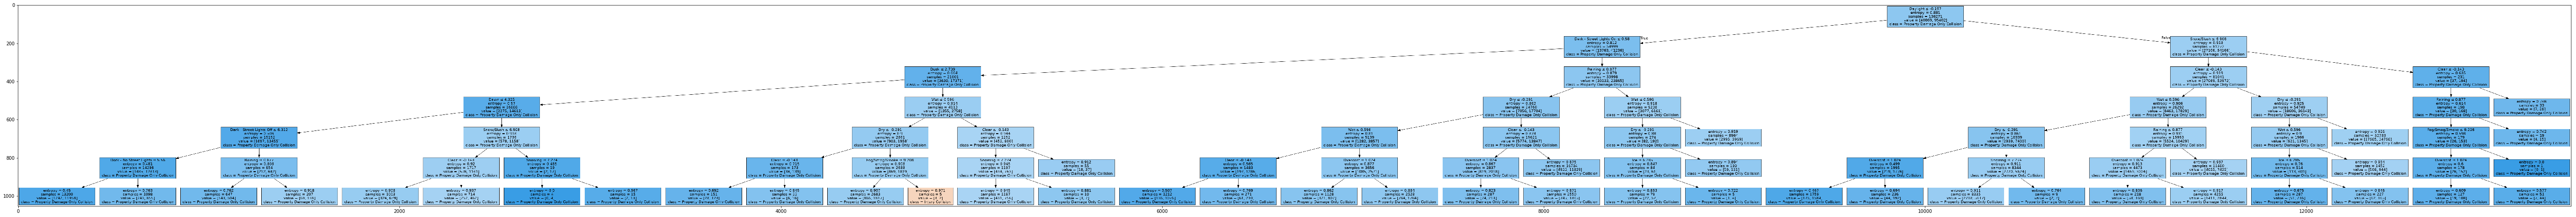

In [35]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

my_data = pd.DataFrame(data=X)
my_data["SEVERITYDESC"] = df_tSet['SEVERITYDESC']
featureNames = ['Clear','Fog/Smog/Smoke','Overcast','Raining','Snowing','Dry','Ice','Snow/Slush','Wet','Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dawn','Daylight','Dusk']
#featureNames
dot_data = StringIO()
filename = "svrtree.png"
targetNames = my_data["SEVERITYDESC"].unique().tolist()
out=tree.export_graphviz(svrTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [36]:
# Classification : Support Vector Machine
# SVM modeling with  Radial basis function
# It takes about 100min
from sklearn import svm

# finding best kernel function
mean_kf = np.zeros(4)
std_kf = np.zeros(4)

for i, kernel in enumerate(['linear', 'poly', 'rbf', 'sigmoid']) :
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_kf[i] = metrics.accuracy_score(y_test, yhat)
    std_kf[i]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_kf


array([0.70345194, 0.70328071, 0.70331495, 0.63484127])

In [37]:
# Classification : SVM using optimizer 'rbf'
# It takes about 20 min
clf = svm.SVC(kernel='rbf', gamma=2)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

# Evaluation
df_report.loc[['SVM'],['F1-score']] = f1_score(y_test, yhat, average='weighted') 
df_report.loc[['SVM'],['Jaccard']] = jaccard_similarity_score(y_test, yhat)
df_report


,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.698127,0.586849,NA
Decision Tree,0.703469,0.581031,NA
SVM,0.703315,0.580988,NA
LogisticRegression,0.000000,0.000000,0


In [38]:
# Classification : Logistic Regression
# Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# finding best numerical optimizer 
mean_lr = np.zeros(5)
std_lr = np.zeros(5)

for i, opt in enumerate(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']) :
    LR = LogisticRegression(C=0.01, solver=opt).fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    mean_lr[i] = metrics.accuracy_score(y_test, yhat)
    std_lr[i]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_lr


array([0.70345194, 0.70345194, 0.70345194, 0.70345194, 0.70345194])

In [39]:
# Evaluation
from sklearn.metrics import log_loss

# Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

df_report.loc[['LogisticRegression'],['F1-score']] = f1_score(y_test, yhat, average='weighted') 
df_report.loc[['LogisticRegression'],['Jaccard']] = jaccard_similarity_score(y_test, yhat)
df_report.loc[['LogisticRegression'],['LogLoss']] = log_loss(y_test, yhat_prob)
df_report


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.698127,0.586849,NA
Decision Tree,0.703469,0.581031,NA
SVM,0.703315,0.580988,NA
LogisticRegression,0.703452,0.580990,0.590949
